# Neural Networks (MACS 30100)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), March 2018
The code in this Jupyter notebook was written using Python 3.6. It uses data files ?. For the code to run properly, you will either need to have access to the internet or you should have the data file in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data.

This notebook follows some of the material in Hastie, et al (2009, Ch. 11) and Géron (2017, Chs. 9-14).

1. Biological neurons and biological neural networks (BNN)
2. Artificial neural networks (ANN)
3. Deep neural networks and deep learning
4. Neural nets with Python and TensorFlow

In addition to Hastie, et all (2009) and Géron (2017), Nelson (2015, Ch. 1) provides a very accessible book chapter on neural networks.

## 1. Biological neurons and biological neural networks
Géron (2017, pp.257-258) has a nice introduction to biological neurons. This is a nice place to start because it lays out the analogy from which comes much of the neural net nomenclature. The figure below is a labeled drawing of a biological neuron and apears as Figure 10.1 from Géron (2017) and is by Bruce Blaus [Creative Commons 3.0 (https://creativecommons.org/licenses/by/3.0/), reproduced from https://en.wikipedia.org/wiki/Neuron].

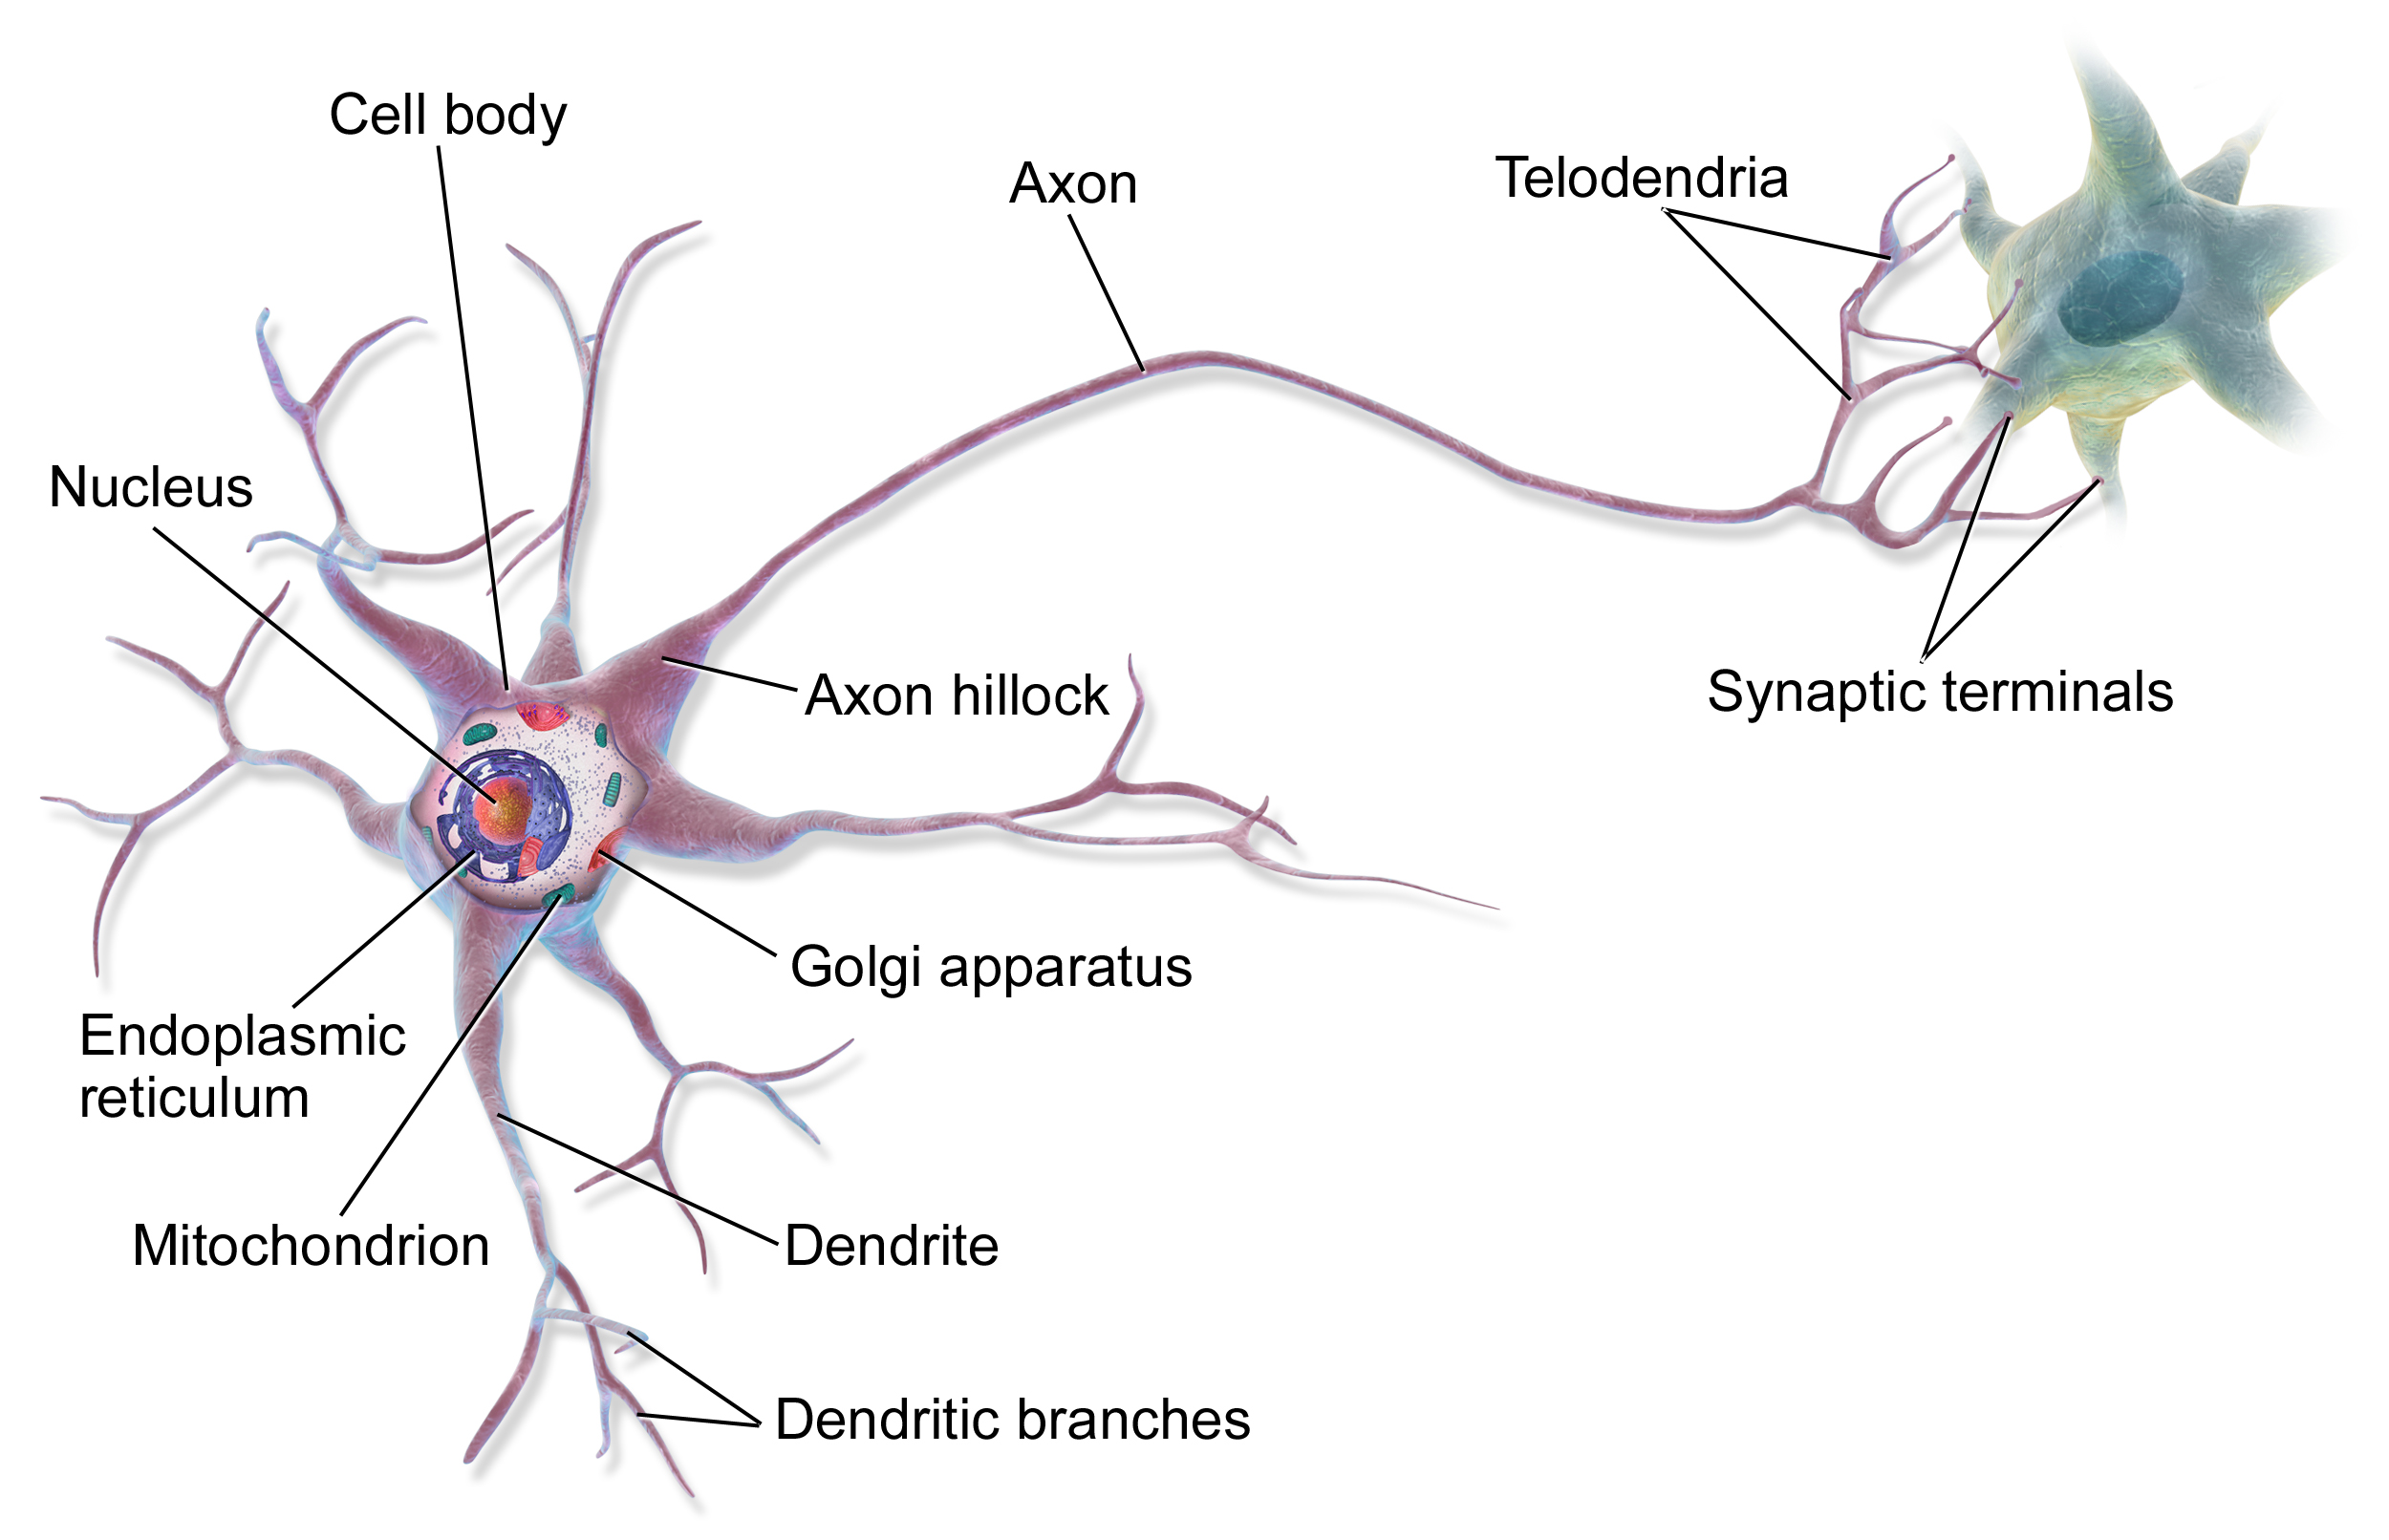

The neuron is a brain cell with a complex nucleus, branched called dendrites, and a long extension called an axon. "The axon's length may be just a few times longer than the cell body, or up to tens of thousands of times longer." At the end of the axon are smaller branches called telodendria, the tips of which are called synaptic terminals (or just synapses). These synaptic terminals connect directly to the dendrites or nuclei of other neurons. "Biological neurons receive short electrical impulses called signals from other neurons via these synapses. When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it fires its own signal."

Although it is still an area of active research as to how the brain works, it seems like neurons are organized in consecutive layers. The figure below is Figure 10.2 from Géron (2017). It is a drawing of a cortical lamination of Golgi-stained cortex of a 1.5-month old infant. The Golgi stain shows the dendrites and axons of a random subset of neurons. By Santiago Ramon y Cajal (public domain) Reproduced from https://en.wikipedia.org/wiki/Cerebral_cortex].

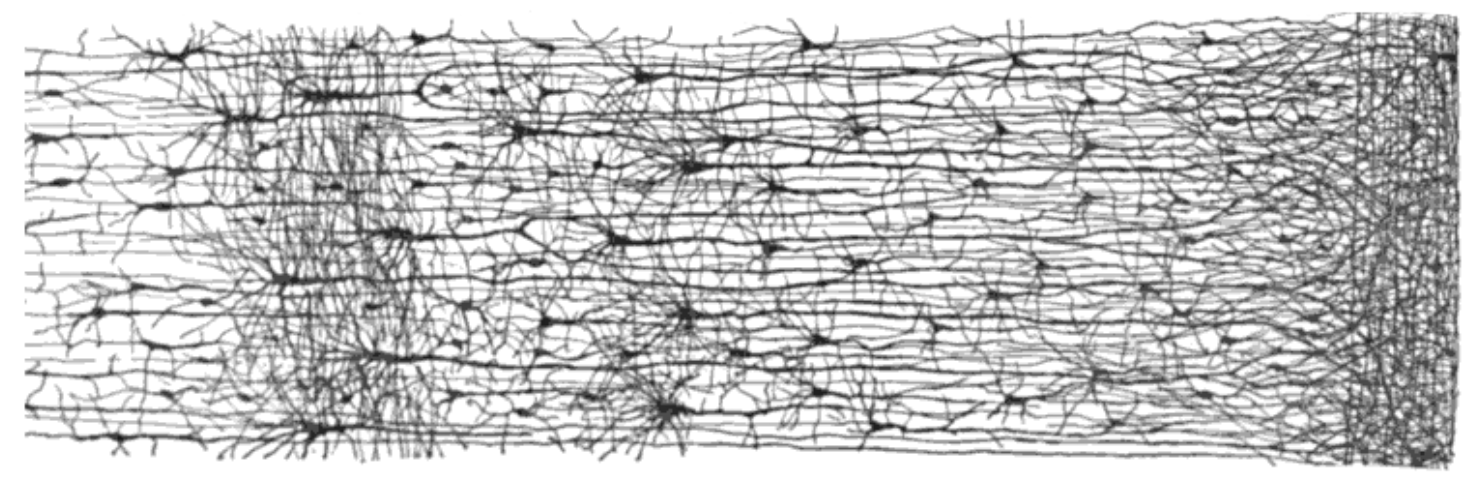

It is thought that each neuron sends and receives simple information. But together, the nonlinear networks of neurons could produce rich messages. These are called biological neural networks (BNN).

## 2. Artificial neural network (ANN)
Artificial neural networks (ANN) were first proposed by McCulloch and Pitts (1943), who presented a simplified model of how biological neurons might work together pass these complex messages using *propositional logic*. Early work in ANNs hit a wall around the 1960's due to computational intractability. It was too complex

We will interchangeably use the simplified term "neural networks" to refer to ANNs from here forward.

### 2.1. Projection pursuit regression (PPR)
Hastie, et al (2009) use the general projection persuit regression (PPR) model to motivate neural network. Let the feature vector be $X=\{X_1,X_2,...X_P\}$ and let the target variable be $Y$. Let $\omega_m$ for $m=1,2,...M$ be unit $p$-vectors of parameters. The PPR model is the following.

$$ f(X) = \sum_{m=1}^M g_{m}\left(\omega_m^T X\right) $$

Think of $\eta_m\equiv\omega_m^T X$ as a linear predictor of $X$. The nonlinear $g_m$ functions are called ridge functions and map $g:\mathbb{R}^P\rightarrow\mathbb{R}$. Then the PPR $f(X)$ is an ensemble method. It is a sum of $M$ nonlinear transformations $g_m$ of the linear predictor $\eta_m$. The objective of the PPR model is to estimate the weights $\omega_m$ and the ridge functions $g_m$ to minimize some error criterion function.

"The PPR model is very general, since the operation of forming nonlinear functions of linear combinations generates as surprisingly large class of models.... In fact, if $M$ is taken arbitrarily large, for appropriate choice of $g_m$ the PPR model can approximate any continuous function in $\mathbb{R}^P$ arbitrarily well. Such a class of models is called a universal approximator."

### 2.2. Neural networks
Figure 11.2 from Hastie, et al (2009) is a schematic diagram of a neural network. Hastie, et al (2009) suggest that neural networks have generated a great deal of hype, making them seem like a panaceal model to end all models. However, this is not the case. The neural network is simply an ensemble of nonlinear functions of linear function of features. The signature characterization of neural networks is that they are nested layers of PPRs.

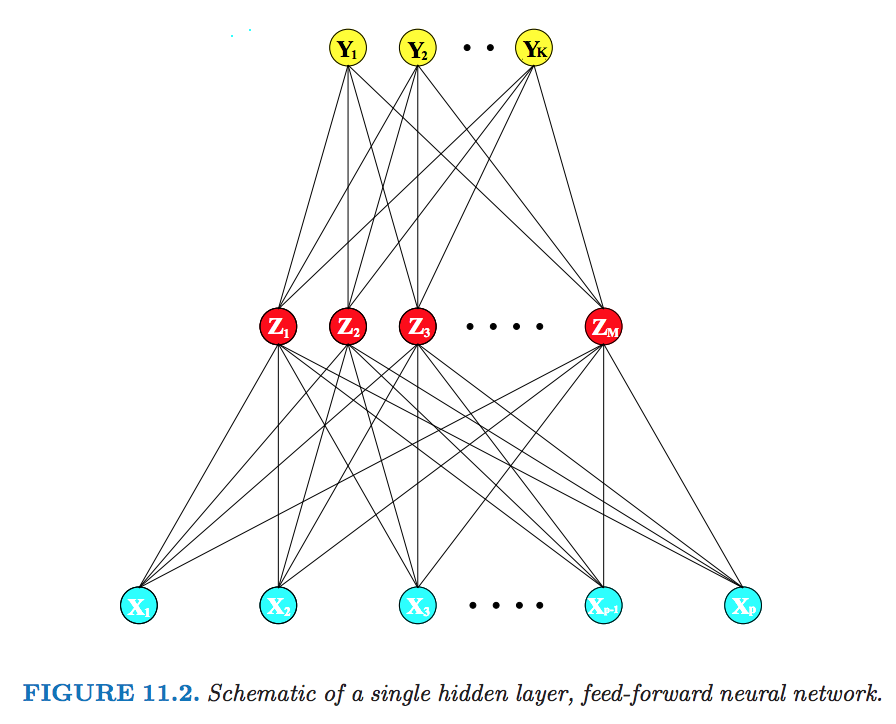

Figure 11.2 is a neural network classifier. For a $K$-class problem such that the target variable $Y_k=\{0,1\}$ indicates one of $K$ values $k=1,2,...K$ (the top layer or output layer). Assume $P$ observable features $X=\{X_1,X_2,...X_P\}$.

Define $Z=\{Z_1,Z_2,...Z_M\}$ as $M$ hidden layer nodes. Let each $Z$ and $Y$ node from Figure 11.2 be called a *neuron*, a node that has one or more nodes feeding into it. McCulloch and Pitts (1943) showed that even with simplified logical neurons, it is possible to build ANNs that computes any logical proposition of arbitrary complexity.

Figure 11.2 shows a single hidden layer neural net classifier, sometimes called a multi-layer perceptron (MLP) classifier.

A neural network regression model would be similar to Figure 11.2, except for the output layer would only have one node $Y$, which would be a continuous real value.

$$ Z_m = \sigma\left(\alpha_{0m} + \alpha_m^T X\right) \quad\text{for}\quad m = 1,...M $$
$$ Y_k = f_k\bigl(Z(X)\bigr) = g_k\left(\beta_{0k} + \beta_k^T Z\right) \quad\text{for}\quad k = 1,...K $$

Rosenblatt (1957) was the first to characterize the single $Z_m = \sigma\left(\alpha_{0m} + \alpha_m^T X\right)$ unit the *perceptron*, which is also called a *linear threshold unit* (LTU). Let the $\sigma(\cdot)$ function be called the threshold function or the *activation function*. The activation function can be a step function. But more amenable to estimating the underlying parameters is to use a continuous function. Most common candidates are:

* The sigmoid function $\sigma(v)=\frac{1}{1 + e^{-v}}$.
* The hyperbolic tangent function $tanh(v) = 2\sigma(2v) - 1$.
* The ReLU (rectified linear unit) function $ReLU(v) = \max(0,v)$.
* The Gaussian radial basis function $Gauss(v) = \exp\Bigl(-\gamma\sum_{j=1}^P\bigl(v - 0\bigr)^2\Bigr)$ [known as a radial basis function network].

Each layer of the neural net can include an additional bias parameter $\alpha_{0m}$ or $\beta_{0k}$ that acts as an intercept in the linear predictor function.

For neural network regression models, the output function $g_k$ is generally chosen to be the identity function $g_k\left(\beta_{0k} + \beta_k^T Z\right) = \beta_{0k} + \beta_k^T Z$. For neural network classification models, the output function is generally chosen to be the *softmax* function used in the multinomial logit model.

$$ g_k\left(\beta_{0k} + \beta_k^T Z\right) = \frac{e^{\beta_{0k} + \beta_k^T Z}}{\sum_{j=1}^K\left(\beta_{0j} + \beta_j^T Z\right)} $$

### 2.2.1. Fitting a neural net
Fitting a neural network involves choosing $M(P+1)$ alpha weights $\{\alpha_{0m},\alpha_{1m},...\alpha_{Pm}\}_{m=1}^M$ and $K(M+1)$ beta weights $\{\beta_{0k},\beta_{1k},...\beta_{Mk}\}_{k=1}^K$ to minimize the sum of squared errors distance metric,

$$ R\left(\alpha,\beta\right) = \sum_{k=1}^K \sum_{i=1}^N\Bigl(y_{ik} - f_k(x_i)\Bigr)^2 $$

The generic approach to minimizing $R(\alpha,\beta)$ is by gradient descent, called back-propagation in this setting.

Issues to discuss:
* Model is usually overparameterized
* Minimization problem is nonconvex

1. Starting values. Most MLP packages will choose starting values for the weights $\alpha, \beta$ to be random values near zero. Because of the shape of the activation function, the model will start out nearly linear and becomes more nonlinear as the weights incrase.

2. Scale inputs. You need to scale all the inputs to have mean zero and standard deviation of one. This can be automatically done by using the `sklearn.preprocessing.StandardScaler` function. The variables can then be transformed back to their original scale by multiplying by the standard deviation and adding the mean.

3. Regularization with weight decay or shrinkage using a penalty on the weight size.

4. Number of hidden units $M$ and layers (deep learning).

5. Multiple minima. Use multiple starting values or average (ensemble) the results.

In [1]:
# Import a bunch of stuff
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Mean accuracy on test data= 0.95 , MSE= 0.05
Mean accuracy on test data= 0.875 , MSE= 0.125
Mean accuracy on test data= 0.9 , MSE= 0.1


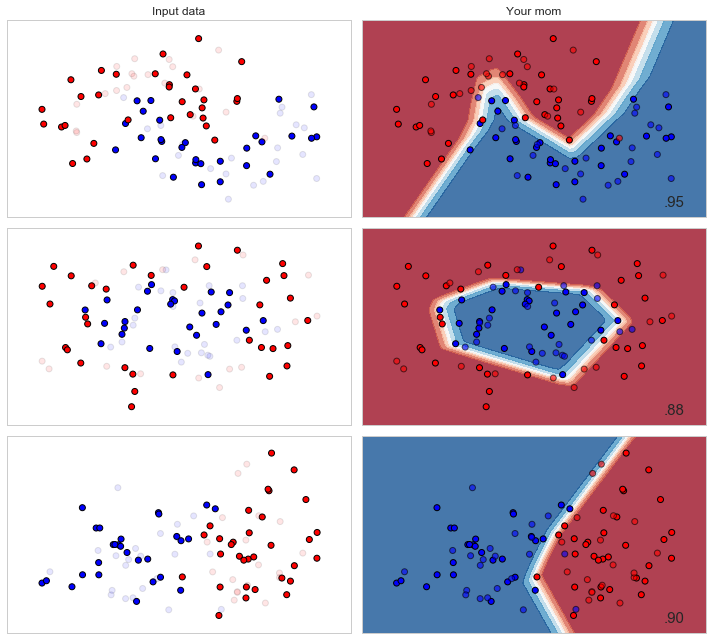

In [10]:
# This code is adapted from the scikit-learn documentation example that
# tests the fit of different classifiers
# "http://scikit-learn.org/stable/auto_examples/classification/
#  plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"

h = .02  # step size in the mesh

clf_mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.1)

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(10, 9))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.1,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    ax = plt.subplot(len(datasets), 2, i)
    clf_mlp.fit(X_train, y_train)
    score_mlp = clf_mlp.score(X_test, y_test)
    print('Mean accuracy on test data=', score_mlp, ', MSE=', '{0:.3}'.format(1.0 - score_mlp))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf_mlp, "decision_function"):
        Z = clf_mlp.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title('Your mom')
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score_mlp).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


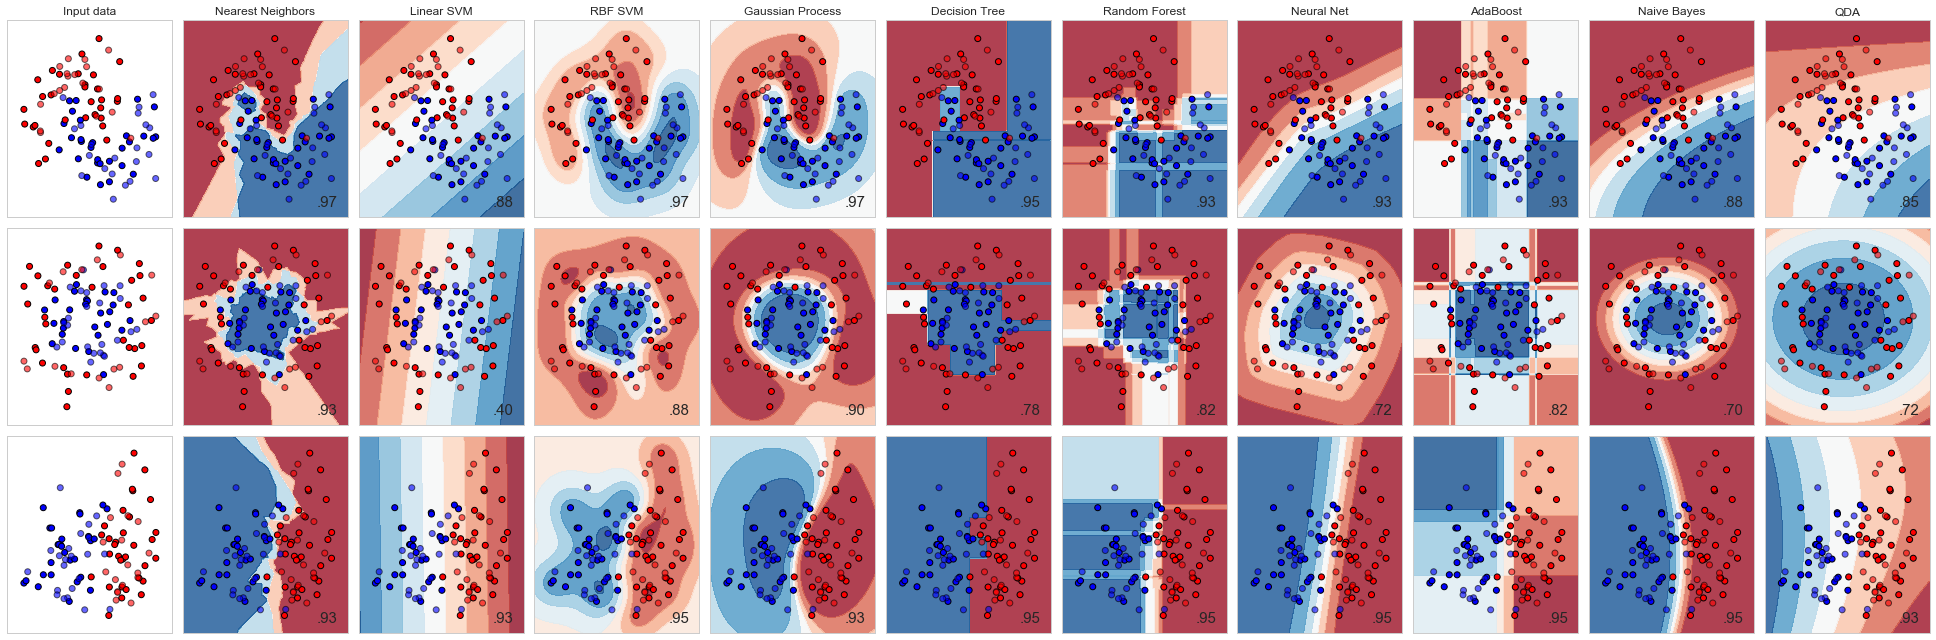

In [11]:
# This code is adapted from the scikit-learn documentation example that
# tests the fit of different classifiers
# "http://scikit-learn.org/stable/auto_examples/classification/
#  plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## 3. Deep neural networks and deep learning
A deep neural network is a neural network with more than one hidden layer. Deep learning refers to a learning model--either regression or classifier model--with a deep neural network.

## 4. Neural nets with Python and TensorFlow
Great [tutorial by KDnuggets](https://www.kdnuggets.com/2016/02/scikit-flow-easy-deep-learning-tensorflow-scikit-learn.html) on deep learning in Scikit-learn using TensorFlow. Also, Géron (2017, Chs. 9, 11, 12) have some great tutorial info on using TensorFlow.

## References
* Géron, Aurélien, *Hands-On Machine Learning with Scikit-Learn & TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, O'Reilly (2017).
* Hastie, Trevor, Robert Tibshirani, and Jerome Friedman, [*The Elements of Statistical Learning: Data Mining, Inference, and Prediction*](https://web.stanford.edu/~hastie/Papers/ESLII.pdf), 2nd Edition, Springer (2009).
* McCulloch, Warren, S. and Walter H. Pitts, "A Logical Calculus of Ideas Immanent in Nervous Activity," *Bulletin of Mathematical Biophysics*, vol. 5, pp. 115-133 (1943).
* Nelson, Michael A., [*Neural Networks and Deep Learning*](http://neuralnetworksanddeeplearning.com/chap1.html), Determination Press (2015).
* Rosenblatt, Frank, "[The Perceptron: A Perceiving and Recognizing Automaton](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf)," Cornell Aeronautical Laboratory, Inc., Report No. 85-460-1 (January 1957).